# Genotype data preprocessing

**FIXME: a general comment -- I am thinking this kind of notebook (that sits outside these folders) should be of a tutorial nature. It should only contain `sos run` commands interactively with enough text explanations. For those who want to run the default analysis they should work with `master_control.ipynb` and generate the commands to run as is. For those who want to customize the analysis, they should refer to each of these "recipe" and change the parameters here. That should cover 95% user cases. People will read the module notebooks only for learning purpose. For those who want to edit the module notebooks we will consider them developers or at least power users and I expect few of them.**


**This tutorial contains examples on running the light yellow, dark yellow, and red section of the following diagram.**

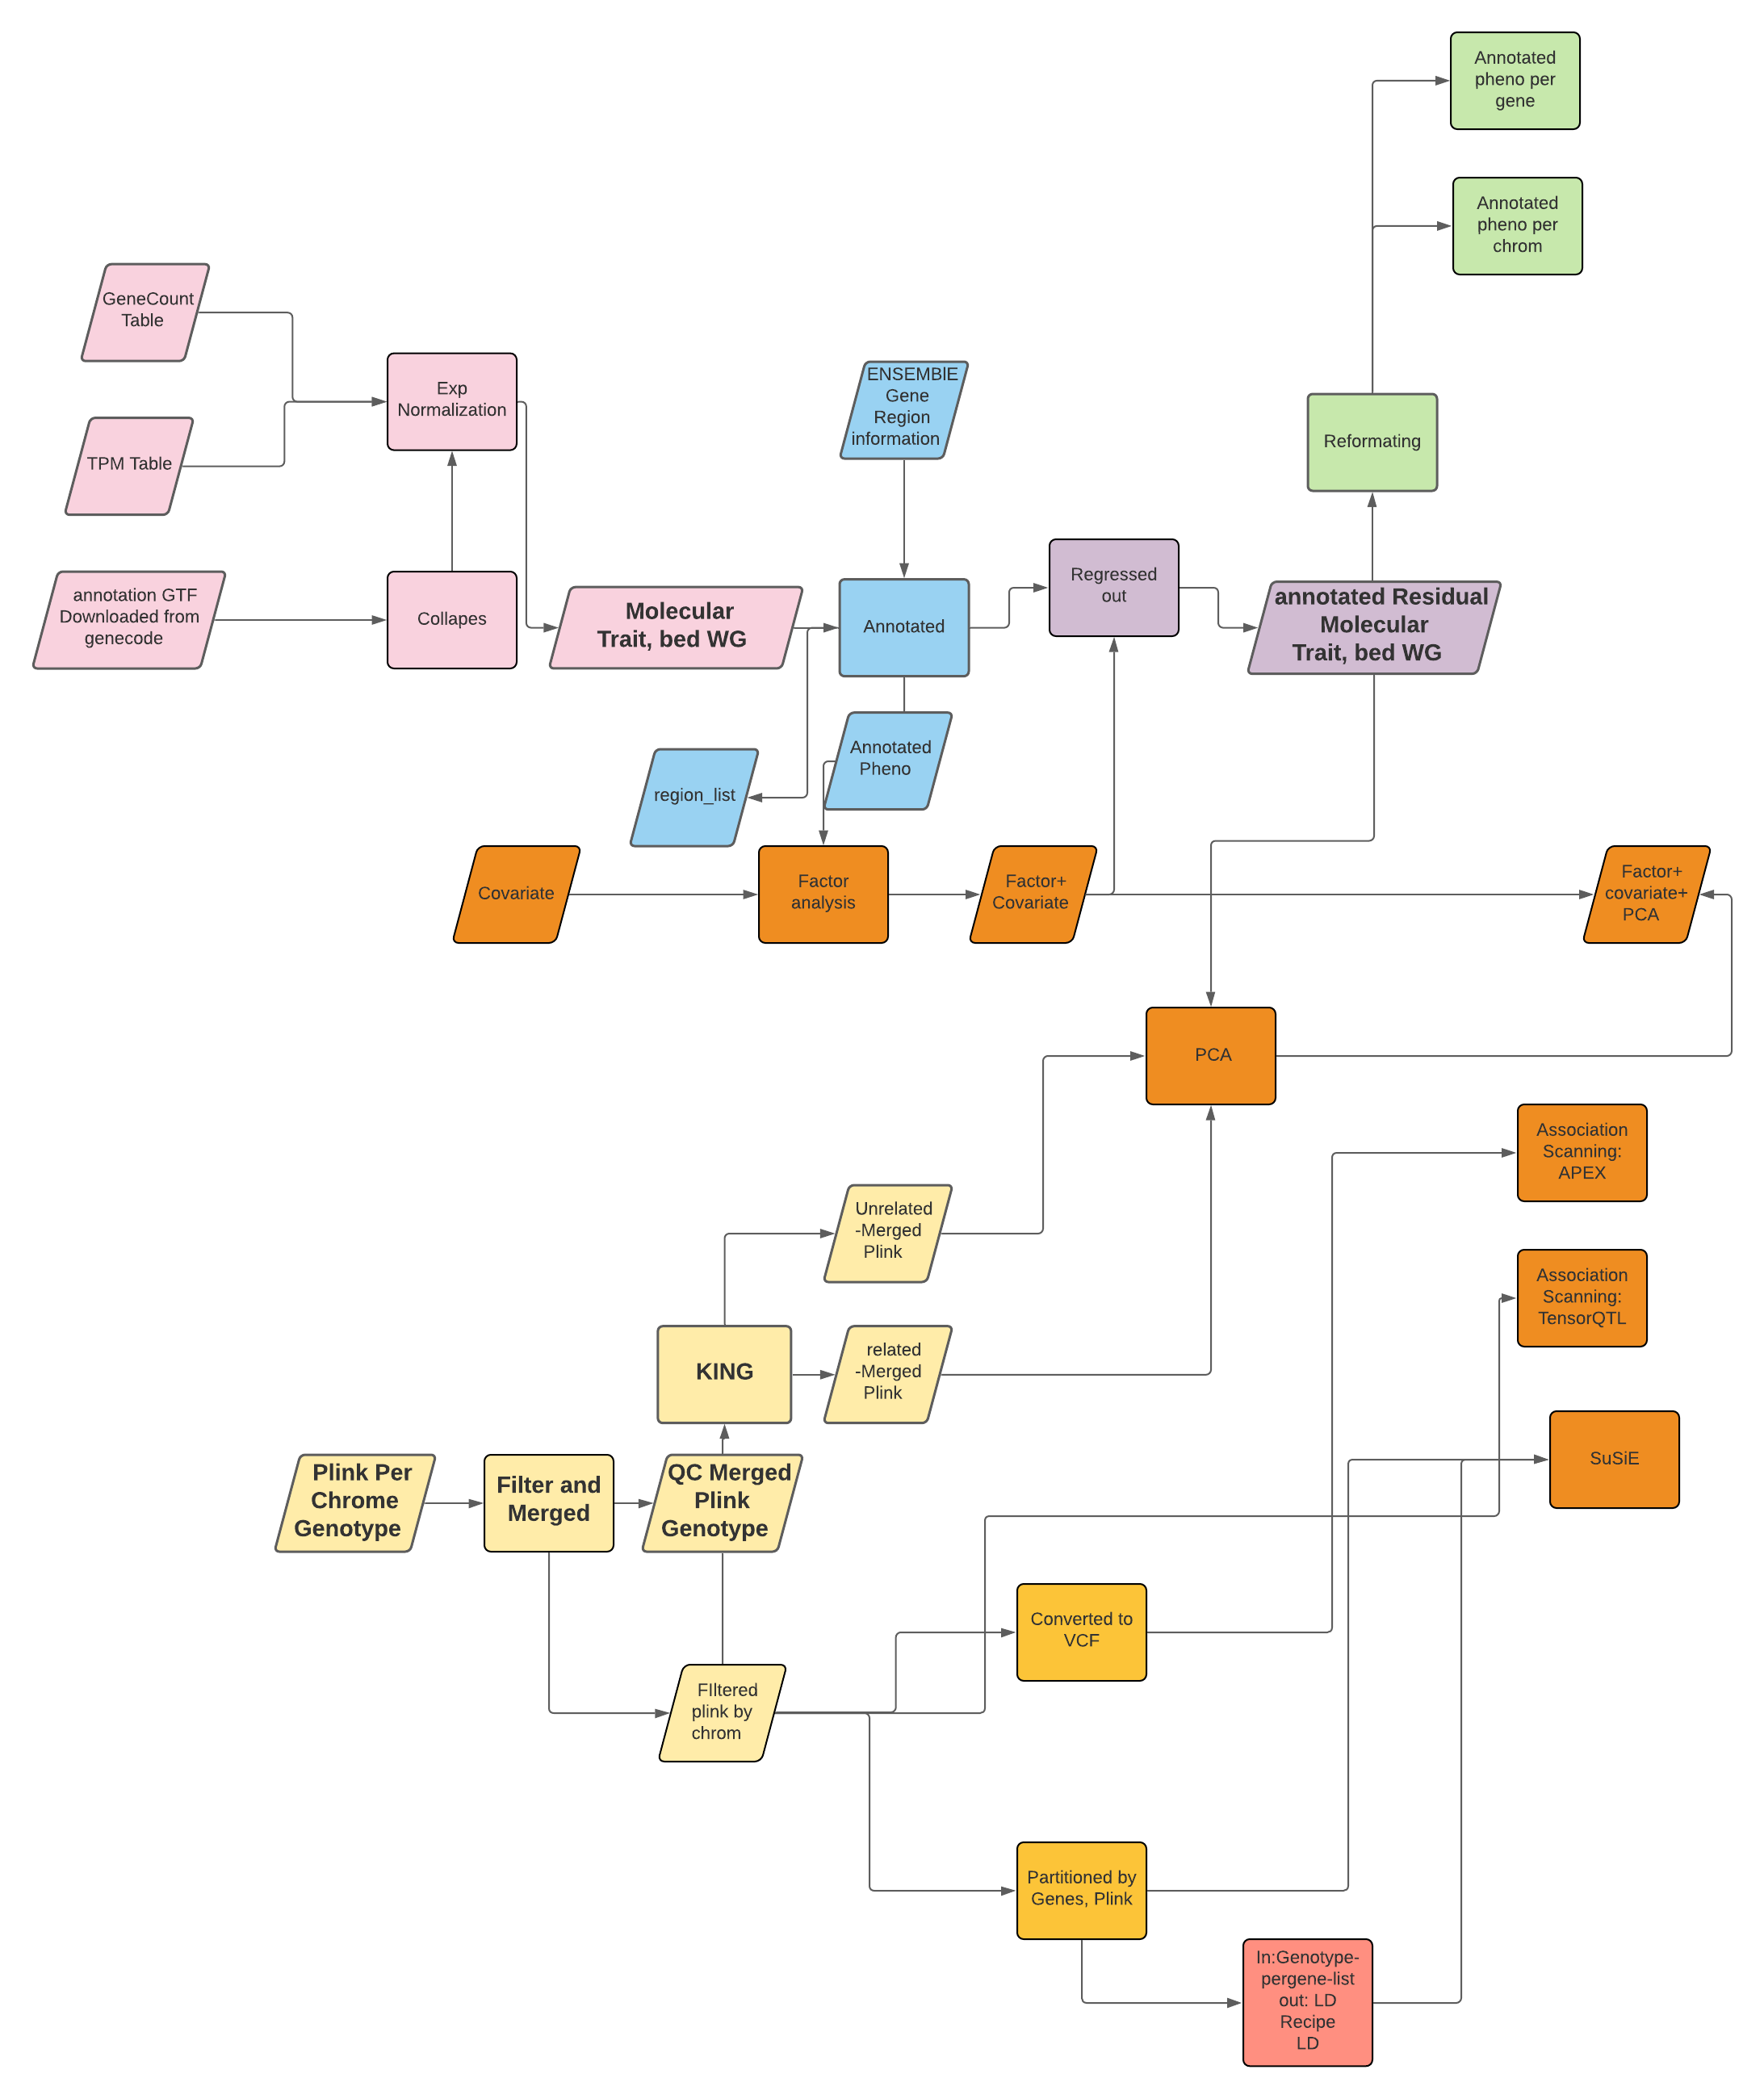

## Genotype QC(light yellow)

In [ ]:
nohup sos run  /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/genotype/GWAS_QC.ipynb qc \
    --genotype_list /home/hs3163/GIT/ADSPFG-xQTL/MWE/mwe_genotype_list \
    --cwd /mnt/mfs/statgen/xqtl_workflow_testing/demo/GWAS_QC/ \
    --name "demo" \
    --merged_prefix "merge" \
    --container_lmm "/mnt/mfs/statgen/containers/lmm.sif" &

## GRM

In [ ]:
nohup sos run  /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/genotype/GRM.ipynb  GRM\
    --genotype_list /mnt/mfs/statgen/xqtl_workflow_testing/demo/GWAS_QC/demo.processed_genotype.plink_per_chrom.recipe \
    --wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/GRM/ \
    --name "demo" \
    --container "/mnt/mfs/statgen/containers/twas_latest.sif" &

## Reformatting and partition(dark yellow)

In [ ]:
nohup sos run  /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/genotype/genotype_formatting.ipynb plink2vcf\
    --genotype_list /mnt/mfs/statgen/xqtl_workflow_testing/demo/GWAS_QC/demo.processed_genotype.plink_per_chrom.recipe \
    --wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/genotype_reformmating/ \
    --name "demo" \
    --region_list /home/hs3163/GIT/ADSPFG-xQTL/MWE/mwe_region  \
    --container "/mnt/mfs/statgen/containers/apex.sif" &

nohup sos run  /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/genotype/genotype_formatting.ipynb plink_by_gene \
    --genotype_list /mnt/mfs/statgen/xqtl_workflow_testing/demo/GWAS_QC/demo.processed_genotype.plink_per_chrom.recipe \
    --wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/genotype_reformmating/ \
    --name "demo" \
    --region_list /home/hs3163/GIT/ADSPFG-xQTL/MWE/mwe_region  \
    --container "/mnt/mfs/statgen/containers/apex.sif" &

## LD (Red)

In [ ]:
nohup sos run  /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/genotype/LD.ipynb LD \
    --genotype_list /mnt/mfs/statgen/xqtl_workflow_testing/module/genotype_format/demo_per_gene_plink/plink_per_gene_list \
    --wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/LD/  \
    --name "demo" \
    --container "/mnt/mfs/statgen/containers/twas_latest.sif" &